In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os 


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one  From the practical lectures https://github.com/riccardopinosio/DDB_AI

# Exploraty Data Analysis (EDA) 

### Reading the excel files into a panda dataframe to make it accessible
### Print the head of the dataframe to get a feeling for the frame


In [3]:
sales = pd.read_excel('sales.xlsx') # Olga from this website  https://datatofish.com/read_excel/
sales.head() # Olga
sales.tail()

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust
2,2000,January 28th,Santitos,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos
3,2002,2002 (Wide) by,Frank McKlusky C.I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...
4,2002,January 25th,A Walk to Remember,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...


,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
30607,2021,January 1st,Jokbeoldu sinmun iyagi,Documentary,12356.0,NaN,12356.0,NaN,NaN,NaN,NaN,NaN,168.0,NaN,Factual,https://www.the-numbers.com/movie/Jokbeoldu-si...
30608,2021,March 5th,My Salinger Year,Drama,914119.0,54730.0,968849.0,NaN,NaN,28851.0,123.0,2.0,101.0,Set in New York City,Contemporary Fiction,https://www.the-numbers.com/movie/My-Salinger-...
30609,2021,January 1st,Escort Vehicle 36,Action,240000.0,NaN,240000.0,NaN,NaN,NaN,NaN,NaN,85.0,NaN,Historical Fiction,https://www.the-numbers.com/movie/Escort-Vehic...
30610,2021,May 21st,The Dry,Thriller/Suspense,16987526.0,364397.0,17351923.0,NaN,NaN,119364.0,186.0,2.5,118.0,Crime Thriller,Contemporary Fiction,https://www.the-numbers.com/movie/Dry-The-(Aus...
30611,2021,January 1st,Posledniy bogatyr. KorenÃ¢â‚¬â„¢ Zla,Adventure,33396899.0,NaN,33396899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Super Hero,https://www.the-numbers.com/movie/Posledniy-bo...


In [4]:
meta = pd.read_excel('metaClean43Brightspace.xlsx') # Olga from this website  https://datatofish.com/read_excel/
meta.head(2) # Olga
meta.tail(2)

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11


,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
11362,https://www.metacritic.com/movie/zootopia,Zootopia,Walt Disney Studios Motion Pictures,| PG,108.0,NaN,Byron Howard,"Action,Adventure,Comedy,Crime,Animation,Family",NaN,"#80BestMovieof2016 , #11MostDiscussedMovieof20...",78,8.6,2016-03-04
11363,https://www.metacritic.com/movie/zus-zo,Zus & zo,Lifesize Entertainment,NaN,106.0,NaN,Paula van der Oest,"Fantasy,Comedy,Romance",A quirky romantic comedy about 3 sisters who c...,NaN,50,7.2,2003-02-07


In [5]:
#expert = pd.read_excel('ExpertReviewsClean43LIWC.xlsx') # Olga from this website  https://datatofish.com/read_excel/
#expert.head(2) # Olga
#expert.tail(2)

In [6]:
#user = pd.read_excel('UserReviewsClean43LIWC.xlsx') # Olga from this website  https://datatofish.com/read_excel/
#user.head(2) # Olga
#user.tail(2)

### Cleaning the data from non useful and non value data

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      30612 non-null  int64  
 1   release_date              30612 non-null  object 
 2   title                     30604 non-null  object 
 3   genre                     28908 non-null  object 
 4   international_box_office  21575 non-null  float64
 5   domestic_box_office       11884 non-null  float64
 6   worldwide_box_office      21575 non-null  float64
 7   production_budget         4480 non-null   float64
 8   Unnamed: 8                0 non-null      float64
 9   opening_weekend           10929 non-null  float64
 10  theatre_count             10963 non-null  float64
 11  avg run per theatre       10952 non-null  float64
 12  runtime                   24559 non-null  float64
 13  keywords                  12517 non-null  object 
 14  creati

<AxesSubplot:>

Text(0, 0, '0')

Text(0, 1, '0')

Text(8, 2, '8')

Text(1704, 3, '1704')

Text(9037, 4, '9037')

Text(18728, 5, '18728')

Text(9037, 6, '9037')

Text(26132, 7, '26132')

Text(30612, 8, '30612')

Text(19683, 9, '19683')

Text(19649, 10, '19649')

Text(19660, 11, '19660')

Text(6053, 12, '6053')

Text(18095, 13, '18095')

Text(3945, 14, '3945')

Text(0, 15, '0')

Text(0.5, 0, 'Missing Value Count')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Missing Value count By Features')

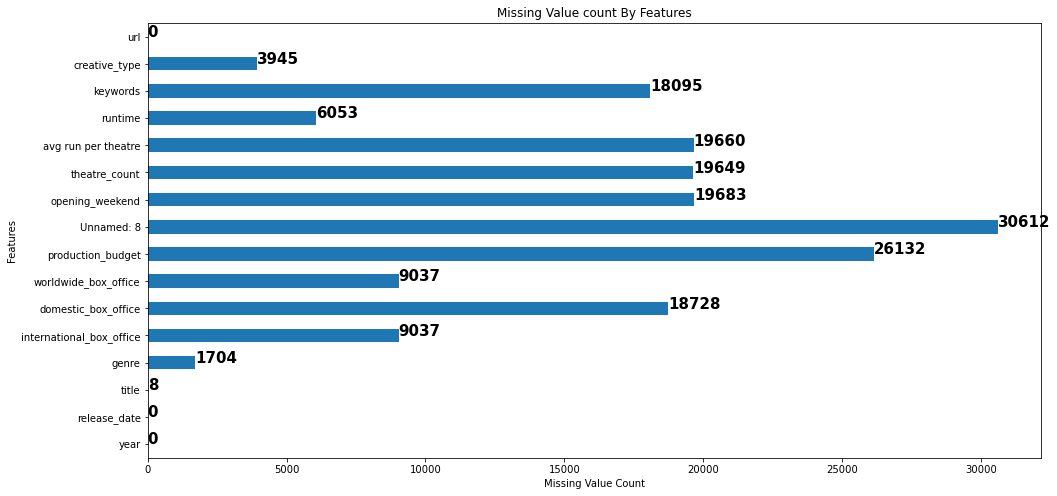

In [8]:
#observing no. of null values in each column   Shaun
sales.isna().sum().plot(kind="barh", figsize=(16,8))
for i, v in enumerate(sales.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")
plt.show()

## We observe that apart from year, release_date, title, genre  and international_box_office, the rest have too many null values to be useful. We will drop those

In [9]:
sales = sales.drop(sales.columns[[5,6,7,8,9,10,11,12,13,14,15]], axis=1)   #Olga
sales = sales.dropna()  #Olga
sales.head()
sales.tail()

,year,release_date,title,genre,international_box_office
0,2000,January 1st,Bakha Satang,Drama,76576.0
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0
4,2002,January 25th,A Walk to Remember,Drama,4833792.0
10,2008,January 18th,Mad Money,Comedy,4375214.0
12,2008,February 1st,Over Her Dead Body,Comedy,14025947.0


,year,release_date,title,genre,international_box_office
30607,2021,January 1st,Jokbeoldu sinmun iyagi,Documentary,12356.0
30608,2021,March 5th,My Salinger Year,Drama,914119.0
30609,2021,January 1st,Escort Vehicle 36,Action,240000.0
30610,2021,May 21st,The Dry,Thriller/Suspense,16987526.0
30611,2021,January 1st,Posledniy bogatyr. KorenÃ¢â‚¬â„¢ Zla,Adventure,33396899.0


<AxesSubplot:>

Text(0, 0, '0')

Text(0, 1, '0')

Text(350, 2, '350')

Text(1067, 3, '1067')

Text(255, 4, '255')

Text(3702, 5, '3702')

Text(14, 6, '14')

Text(20, 7, '20')

Text(5897, 8, '5897')

Text(6977, 9, '6977')

Text(0, 10, '0')

Text(2105, 11, '2105')

Text(0, 12, '0')

Text(0.5, 0, 'Missing Value Count')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Missing Value count By Features')

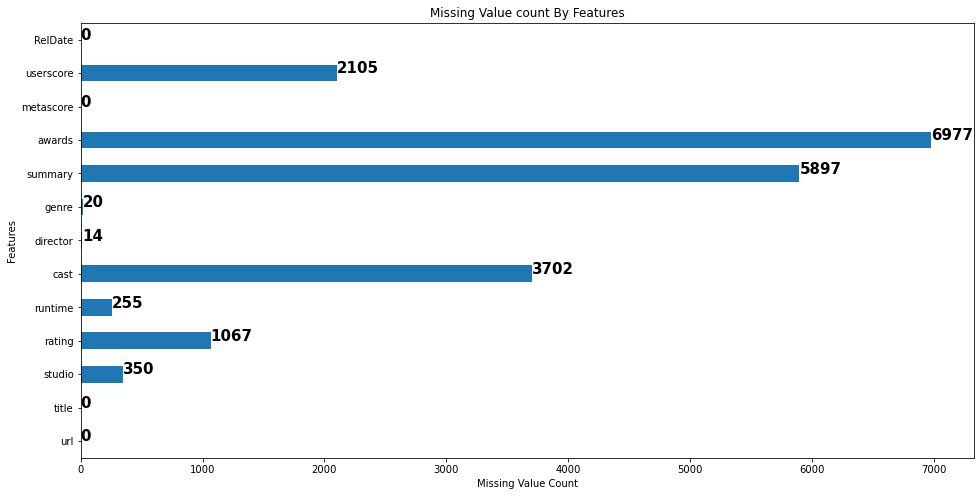

In [10]:
#observing no. of null values in each column   Shaun
meta.isna().sum().plot(kind="barh", figsize=(16,8))
for i, v in enumerate(meta.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")
plt.show()

In [11]:
meta = meta.drop(meta.columns[[0,2,5,7,9,11]], axis=1)   #Olga
meta=meta.dropna()  #Olga
meta.head()
meta.tail()

,title,rating,runtime,director,summary,metascore,RelDate
1,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76,2016-03-11
2,10 Items or Less,| R,82.0,Brad Silberling,While researching a role as a supermarket mana...,54,2006-12-01
4,100 Bloody Acres,| Not Rated,91.0,Cameron Cairnes,Reg and Lindsay run an organic fertilizer busi...,63,2013-06-28
8,"10,000 km",| R,99.0,Carlos Marques-Marcet,"Two people in love, two apartments - one in Ba...",75,2015-07-10
9,1001 Grams,| Not Rated,93.0,Bent Hamer,When Norwegian scientist Marie attends a semin...,65,2015-05-08


,title,rating,runtime,director,summary,metascore,RelDate
11355,Zombieland: Double Tap,| R,99.0,Ruben Fleischer,"Columbus, Tallahasse, Wichita, and Little Rock...",55,2019-10-18
11358,Zoolander,| R,89.0,Ben Stiller,Follows the world's most famous -- and empty-h...,61,2001-09-28
11359,Zoolander 2,| PG-13,102.0,Ben Stiller,Derek (Ben Stiller) and Hansel (Owen Wilson) a...,34,2016-02-12
11360,Zoom,| PG,83.0,Peter Hewitt,A former superhero (Allen) is called back into...,26,2006-08-11
11361,Zoom,| Not Rated,96.0,Pedro Morelli,A multi-dimensional interface between a comic ...,55,2016-09-02


In [12]:
df= pd.merge(
    left=meta,
    right = sales,
    right_on= 'title',
    left_on='title',
    how= 'outer'
) 
df=df.dropna()                  
df.head()
df.tail()   # Olga from this website https://www.shedloadofcode.com/blog/how-to-do-an-index-match-with-python-and-pandas
             #                         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0
4,1001 Grams,| Not Rated,93.0,Bent Hamer,When Norwegian scientist Marie attends a semin...,65.0,2015-05-08,2015.0,May 8th,Drama,36036.0
7,10th & Wolf,| R,107.0,Robert Moresco,A Philadelphia mob war is the backdrop of 10th...,36.0,2006-08-18,2006.0,August 18th,Drama,89080.0
13,12 Years a Slave,| R,134.0,Steve McQueen,"In the pre-Civil War United States, Solomon No...",96.0,2013-10-18,2013.0,October 18th,Drama,124093068.0
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0


,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office
4832,Zoolander 2,| PG-13,102.0,Ben Stiller,Derek (Ben Stiller) and Hansel (Owen Wilson) a...,34.0,2016-02-12,2016.0,February 12th,Comedy,26500000.0
4833,Zoom,| PG,83.0,Peter Hewitt,A former superhero (Allen) is called back into...,26.0,2006-08-11,2016.0,September 2nd,Adventure,2784.0
4834,Zoom,| PG,83.0,Peter Hewitt,A former superhero (Allen) is called back into...,26.0,2006-08-11,2006.0,August 11th,Adventure,516860.0
4835,Zoom,| Not Rated,96.0,Pedro Morelli,A multi-dimensional interface between a comic ...,55.0,2016-09-02,2016.0,September 2nd,Adventure,2784.0
4836,Zoom,| Not Rated,96.0,Pedro Morelli,A multi-dimensional interface between a comic ...,55.0,2016-09-02,2006.0,August 11th,Adventure,516860.0


In [13]:
df.head()

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0
4,1001 Grams,| Not Rated,93.0,Bent Hamer,When Norwegian scientist Marie attends a semin...,65.0,2015-05-08,2015.0,May 8th,Drama,36036.0
7,10th & Wolf,| R,107.0,Robert Moresco,A Philadelphia mob war is the backdrop of 10th...,36.0,2006-08-18,2006.0,August 18th,Drama,89080.0
13,12 Years a Slave,| R,134.0,Steve McQueen,"In the pre-Civil War United States, Solomon No...",96.0,2013-10-18,2013.0,October 18th,Drama,124093068.0
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0


In [14]:
df['runtime']. std()

17.56540405034102

In [15]:
df['runtime']. mean()

105.20809248554913

In [16]:
df.drop(df[df['runtime'] >= 140].index, inplace = True)

In [17]:
df.drop(df[df['runtime'] <= 15].index, inplace = True)

In [18]:
df['international_box_office']. mean()


32680800.68855084

In [19]:

df['international_box_office']. std()

79560872.3258237

In [20]:
df.drop(df[df['international_box_office'] >= 50000000].index, inplace = True)

In [21]:
df.drop(df[df['international_box_office'] <= 100000].index, inplace = True)

In [22]:
conditions = [
    (df['runtime'] <= 80),
    (df['runtime'] > 80) & (df['runtime'] <= 105),
    (df['runtime'] > 105)
]

values = ['short', 'medium', 'long']

df['movie_time'] = np.select(conditions, values)
df.head()

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium


In [23]:
conditions = [
    (df['metascore'] <= 25),
    (df['metascore'] > 25) & (df['metascore'] <= 50),
    (df['metascore'] > 50) & (df['metascore'] <= 75),
    (df['metascore'] > 75) & (df['metascore'] <= 100)
]

values = ['bad', 'average', 'good', 'excellent']

df['movie_score'] = np.select(conditions, values)
df.head()


,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time,movie_score
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium,excellent
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium,excellent
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long,average
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium,good
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium,excellent


In [24]:
conditions = [
    (df['metascore'] <= 14),
    (df['metascore'] > 14) & (df['metascore'] <= 24),
    (df['metascore'] > 24) & (df['metascore'] <= 34),
    (df['metascore'] > 34) & (df['metascore'] <= 44),
    (df['metascore'] > 44) & (df['metascore'] <= 54),
    (df['metascore'] > 54) & (df['metascore'] <= 64),
    (df['metascore'] > 64) & (df['metascore'] <= 74),
    (df['metascore'] > 74) & (df['metascore'] <= 84),
    (df['metascore'] > 84) & (df['metascore'] <= 94),
    (df['metascore'] > 94) & (df['metascore'] <= 100)
]

values = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10']

df['average_score'] = np.select(conditions, values)
df.head()

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time,movie_score,average_score
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium,excellent,8
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium,excellent,8
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long,average,3
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium,good,6
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium,excellent,8


In [25]:
df['metascore'] = df['metascore'].astype(float)

conditions = [
    (df['metascore'] <= 25),
    (df['metascore'] > 25) & (df['metascore'] <= 50),
    (df['metascore'] > 50) & (df['metascore'] <= 75),
    (df['metascore'] > 75) & (df['metascore'] <= 100)
]

values = ['bad', 'average', 'good', 'excellent']

df['movie_score'] = np.select(conditions, values)
df.head()


,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time,movie_score,average_score
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium,excellent,8
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium,excellent,8
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long,average,3
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium,good,6
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium,excellent,8


In [26]:
df['time_score'] = df['movie_score'] +"-"+ df['movie_time'] 

df['genre_time'] = df['genre'] +"-"+ df['movie_time']

df['genre_score'] = df['genre'] +"-"+ df['movie_score']


df.head()

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time,movie_score,average_score,time_score,genre_time,genre_score
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium,excellent,8,excellent-medium,Thriller/Suspense-medium,Thriller/Suspense-excellent
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium,excellent,8,excellent-medium,Drama-medium,Drama-excellent
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long,average,3,average-long,Thriller/Suspense-long,Thriller/Suspense-average
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium,good,6,good-medium,Action-medium,Action-good
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium,excellent,8,excellent-medium,Documentary-medium,Documentary-excellent


In [27]:
#df = df.astype({'genre':'string','director':'string','title':'string','rating':'string','summary':'string', 'release_date':'string', 'movie_time':'string', 'movie_score':'string', 'time_score':'string', 'genre_time':'string', 'genre_score':'string'})

In [28]:
df.dtypes

title                               object
rating                              object
runtime                            float64
director                            object
summary                             object
metascore                          float64
RelDate                     datetime64[ns]
year                               float64
release_date                        object
genre                               object
international_box_office           float64
movie_time                          object
movie_score                         object
average_score                       object
time_score                          object
genre_time                          object
genre_score                         object
dtype: object

In [29]:
df['runtime_score'] = df['runtime'].map(str) +"-"+ df['movie_time'].map(str)

df['genre_rating'] = df['genre_score'].map(str) +"-"+ df['metascore'].map(str)

In [30]:
df.head()

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time,movie_score,average_score,time_score,genre_time,genre_score,runtime_score,genre_rating
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium,excellent,8,excellent-medium,Thriller/Suspense-medium,Thriller/Suspense-excellent,104.0-medium,Thriller/Suspense-excellent-76.0
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium,excellent,8,excellent-medium,Drama-medium,Drama-excellent,94.0-medium,Drama-excellent-82.0
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long,average,3,average-long,Thriller/Suspense-long,Thriller/Suspense-average,120.0-long,Thriller/Suspense-average-34.0
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium,good,6,good-medium,Action-medium,Action-good,105.0-medium,Action-good-63.0
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium,excellent,8,excellent-medium,Documentary-medium,Documentary-excellent,97.0-medium,Documentary-excellent-83.0


In [31]:
df['time_score'].unique()

array(['excellent-medium', 'average-long', 'good-medium',
       'average-medium', 'good-long', 'excellent-long', 'bad-medium',
       'bad-long', 'good-short', 'excellent-short', 'average-short'],
      dtype=object)

Text(-0.09999999999999998, 112, '102')

Text(0.9, 208, '198')

Text(1.9, 423, '413')

Text(2.9, 413, '403')

Text(3.9, 348, '338')

Text(4.9, 112, '102')

Text(5.9, 78, '68')

Text(6.9, 29, '19')

Text(7.9, 23, '13')

Text(8.9, 13, '3')

Text(9.9, 18, '8')

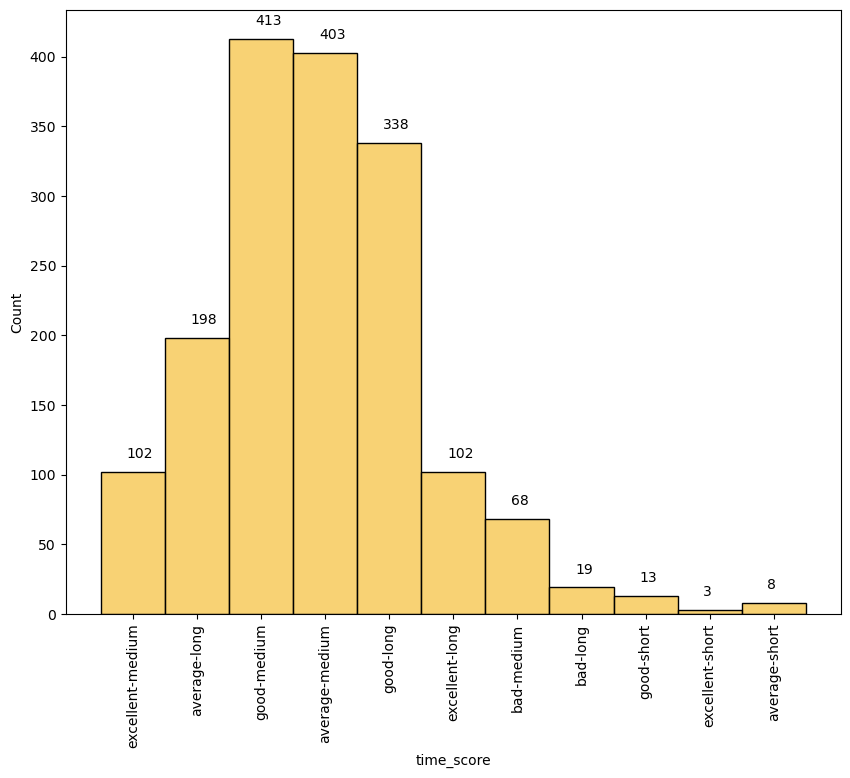

In [32]:
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = sns.histplot(data = df, x = "time_score", discrete = True, color = '#f6c345')
locs, labels = plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 10))
plt.show()

In [33]:
df['genre_score'].unique()

array(['Thriller/Suspense-excellent', 'Drama-excellent',
       'Thriller/Suspense-average', 'Action-good',
       'Documentary-excellent', 'Comedy-average', 'Drama-good',
       'Black Comedy-good', 'Action-average', 'Romantic Comedy-bad',
       'Drama-bad', 'Drama-average', 'Comedy-bad',
       'Romantic Comedy-average', 'Comedy-excellent', 'Comedy-good',
       'Thriller/Suspense-good', 'Adventure-good', 'Musical-good',
       'Romantic Comedy-good', 'Adventure-average', 'Documentary-good',
       'Horror-average', 'Western-good', 'Horror-bad',
       'Black Comedy-average', 'Documentary-average', 'Horror-good',
       'Thriller/Suspense-bad', 'Action-excellent', 'Action-bad',
       'Musical-average', 'Adventure-excellent',
       'Concert/Performance-excellent', 'Concert/Performance-average',
       'Western-average', 'Concert/Performance-good', 'Musical-excellent',
       'Horror-excellent', 'Adventure-bad', 'Multiple Genres-good',
       'Romantic Comedy-excellent', 'Black Come

Text(-0.09999999999999998, 30, '20')

Text(0.9, 128, '118')

Text(1.9, 115, '105')

Text(2.9, 37, '27')

Text(3.9, 39, '29')

Text(4.9, 135, '125')

Text(5.9, 359, '349')

Text(6.9, 27, '17')

Text(7.9, 72, '62')

Text(8.9, 14, '4')

Text(9.9, 19, '9')

Text(10.9, 123, '113')

Text(11.9, 35, '25')

Text(12.9, 59, '49')

Text(13.9, 34, '24')

Text(14.9, 130, '120')

Text(15.9, 100, '90')

Text(16.9, 46, '36')

Text(17.9, 13, '3')

Text(18.9, 35, '25')

Text(19.9, 57, '47')

Text(20.9, 45, '35')

Text(21.9, 92, '82')

Text(22.9, 20, '10')

Text(23.9, 24, '14')

Text(24.9, 22, '12')

Text(25.9, 16, '6')

Text(26.9, 57, '47')

Text(27.9, 26, '16')

Text(28.9, 13, '3')

Text(29.9, 19, '9')

Text(30.9, 13, '3')

Text(31.9, 13, '3')

Text(32.9, 12, '2')

Text(33.9, 11, '1')

Text(34.9, 14, '4')

Text(35.9, 14, '4')

Text(36.9, 12, '2')

Text(37.9, 12, '2')

Text(38.9, 20, '10')

Text(39.9, 11, '1')

Text(40.9, 11, '1')

Text(41.9, 11, '1')

Text(42.9, 12, '2')

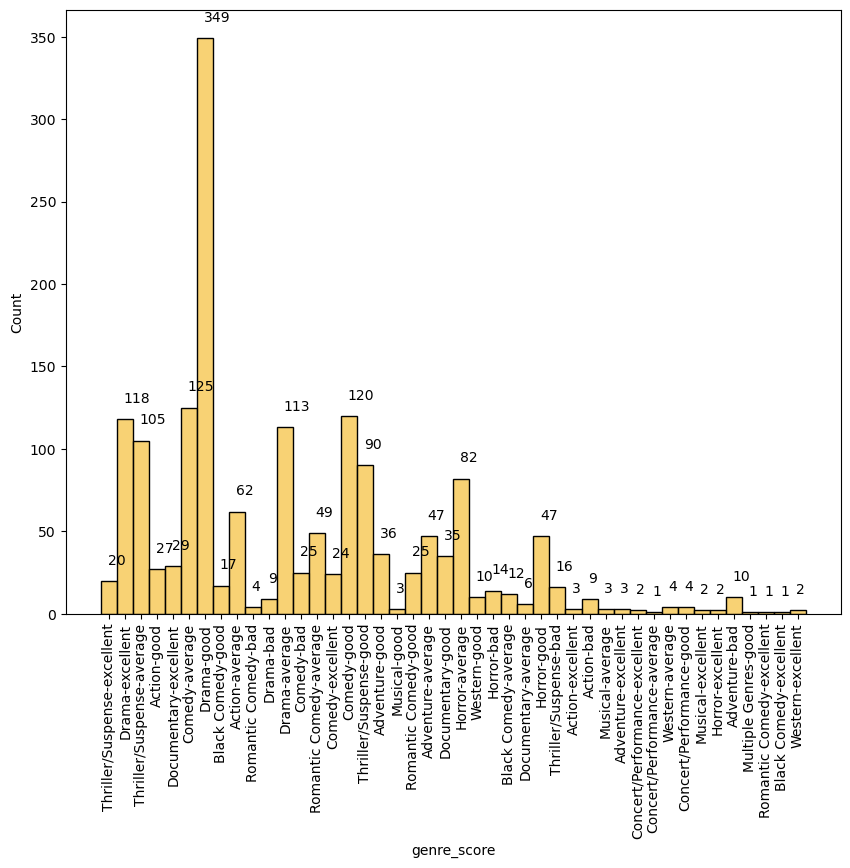

In [34]:
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = sns.histplot(data = df, x = "genre_score", discrete = True, color = '#f6c345')
locs, labels = plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 10))
plt.show()

In [35]:
df['genre_time'].unique()

array(['Thriller/Suspense-medium', 'Drama-medium',
       'Thriller/Suspense-long', 'Action-medium', 'Documentary-medium',
       'Comedy-medium', 'Drama-long', 'Black Comedy-medium',
       'Romantic Comedy-medium', 'Romantic Comedy-long', 'Action-long',
       'Adventure-long', 'Musical-medium', 'Adventure-medium',
       'Documentary-short', 'Horror-medium', 'Western-long',
       'Comedy-long', 'Documentary-long', 'Black Comedy-long',
       'Drama-short', 'Horror-long', 'Musical-long', 'Comedy-short',
       'Adventure-short', 'Horror-short', 'Concert/Performance-medium',
       'Concert/Performance-long', 'Western-medium',
       'Multiple Genres-long', 'Thriller/Suspense-short', 'Action-short'],
      dtype=object)

Text(-0.09999999999999998, 151, '141')

Text(0.9, 277, '267')

Text(1.9, 99, '89')

Text(2.9, 63, '53')

Text(3.9, 54, '44')

Text(4.9, 222, '212')

Text(5.9, 327, '317')

Text(6.9, 30, '20')

Text(7.9, 68, '58')

Text(8.9, 31, '21')

Text(9.9, 57, '47')

Text(10.9, 39, '29')

Text(11.9, 14, '4')

Text(12.9, 70, '60')

Text(13.9, 14, '4')

Text(14.9, 126, '116')

Text(15.9, 21, '11')

Text(16.9, 87, '77')

Text(17.9, 32, '22')

Text(18.9, 20, '10')

Text(19.9, 15, '5')

Text(20.9, 38, '28')

Text(21.9, 14, '4')

Text(22.9, 15, '5')

Text(23.9, 17, '7')

Text(24.9, 11, '1')

Text(25.9, 16, '6')

Text(26.9, 11, '1')

Text(27.9, 15, '5')

Text(28.9, 11, '1')

Text(29.9, 11, '1')

Text(30.9, 11, '1')

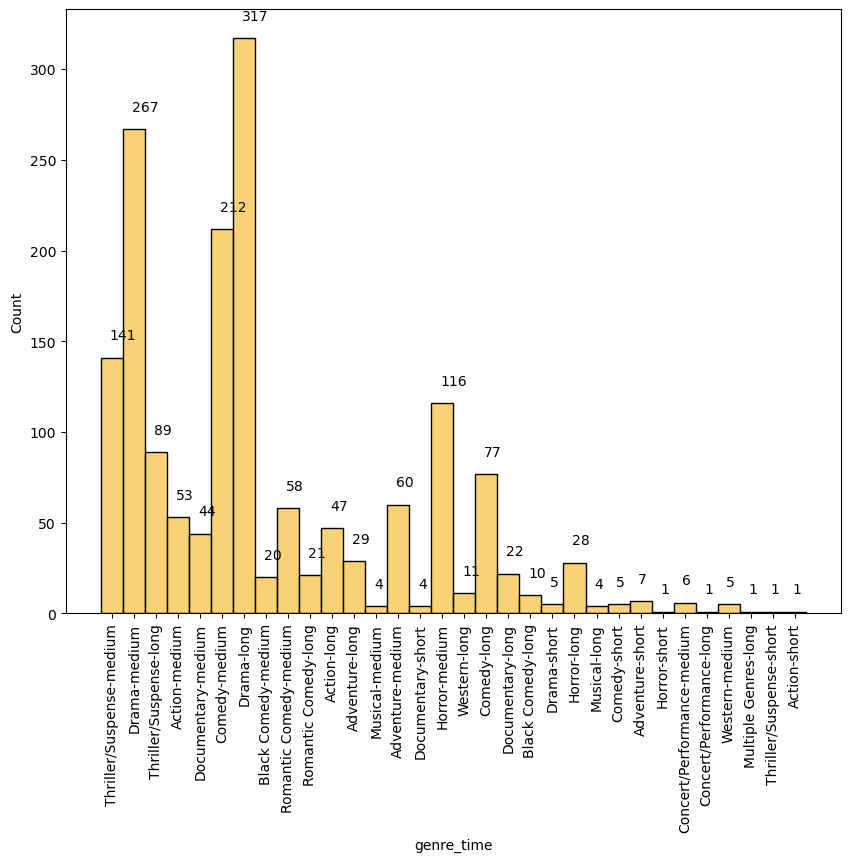

In [36]:
fig = plt.figure(figsize=(10, 8), dpi=100)
ax = sns.histplot(data = df, x = "genre_time", discrete = True, color = '#f6c345')
locs, labels = plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height() + 10))
plt.show()

# Feature analysis 

### What is the correlation between the runtime and the international box office revenue? 

In [37]:
Anovaformula = 'international_box_office ~ movie_time' #Thierry van Gorkum
movie_time_movie_score_genre = smf.ols(Anovaformula, data = df).fit()
twoWay_anova_table = sm.stats.anova_lm(movie_time_movie_score_genre)
print(twoWay_anova_table)

                df        sum_sq       mean_sq         F   PR(>F)
movie_time     2.0  2.438577e+15  1.219288e+15  7.370504  0.00065
Residual    1664.0  2.752723e+17  1.654281e+14       NaN      NaN


The Chi-square test of independence is used to determine whether two categorical or nominal variables are likely to be related or not.
Interpreting the results of our chi-square calculation.The alpha is 0.025. 
The value of the chi square statistic is 249604
The p-value (0.000565) 

H0:There is no difference in the runtime by international box office.
H1:There is a difference in the runtime by international box office.

If the chi-square calculated value is greater than the chi-square critical value, then you reject the null hypothesis. 
If the chi-square calculated value is less than the chi-square critical value, then you "fail to reject" your null hypothesis.

The chi square test is not less than the chi sqaure critical value, so I wil not fail to reject the null hypothesis. 

### What is the correlation between genre(s) and the international box office revenue? 

In [38]:
rp.summary_cat(df[["genre", "international_box_office"]])

,Variable,Outcome,Count,Percent
0,genre,Drama,589,35.33
1,,Comedy,294,17.64
2,,Thriller/Suspense,231,13.86
3,,Horror,145,8.70
4,,Action,101,6.06
...,...,...,...,...
1612,,2392576.0,1,0.06
1613,,14267444.0,1,0.06
1614,,11213147.0,1,0.06
1615,,265186.0,1,0.06


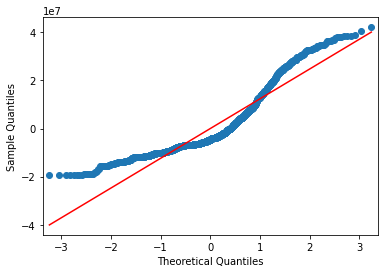

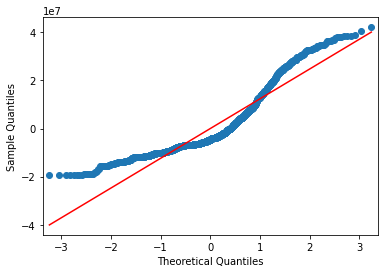

In [39]:
genre_international_box_office_lm = smf.ols('international_box_office ~ genre', data = df).fit() #Thierry van Gorkum
residuals4 = genre_international_box_office_lm.resid
sm.qqplot(residuals4,stats.norm,  line = 's')
plt.show()

(array([496., 754., 217., 137.,  63.]),
 array([-19351664.61458325,  -7064355.43088561,   5222953.75281204,
         17510262.93650968,  29797572.12020733,  42084881.30390498]),
 <BarContainer object of 5 artists>)

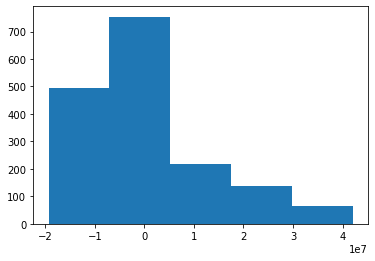

In [40]:
plt.hist(residuals4, bins=5)

<AxesSubplot:xlabel='international_box_office', ylabel='genre'>

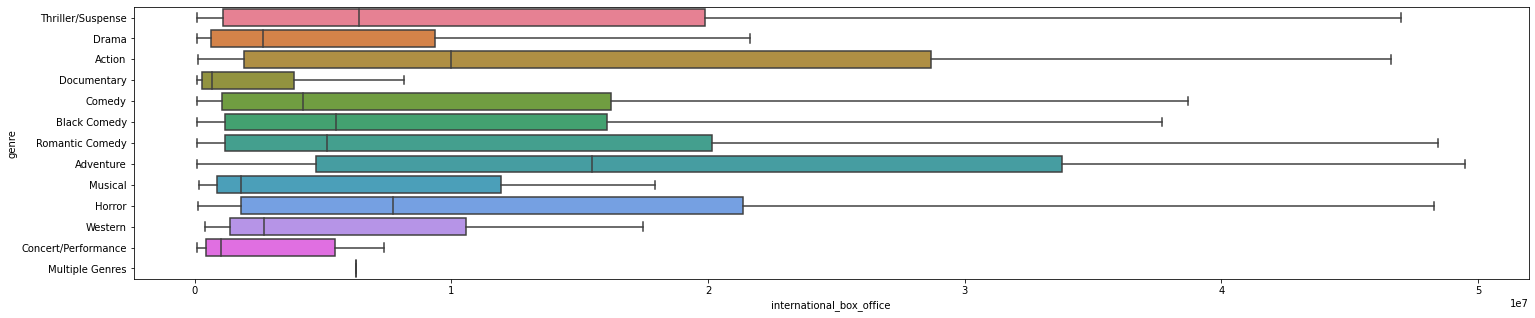

In [41]:
fig = plt.subplots(figsize=(25,5))
sns.boxplot(x ='international_box_office', y = 'genre', data= df, palette="husl", showfliers=False)
plt.show()

In [42]:
Anovaformula2 = 'international_box_office ~ genre' #Thierry van Gorkum
genre_box_office = smf.ols(Anovaformula2, data = df).fit()
anova_table2 = sm.stats.anova_lm(genre_box_office)
print(anova_table2)

              df        sum_sq       mean_sq          F        PR(>F)
genre       12.0  2.257667e+16  1.881389e+15  12.196785  4.397191e-24
Residual  1654.0  2.551343e+17  1.542529e+14        NaN           NaN


### What is the correlation between metascore and the international box office revenue? 

In [43]:
rp.summary_cat(df[["movie_score", "international_box_office"]])

,Variable,Outcome,Count,Percent
0,movie_score,good,764,45.83
1,,average,609,36.53
2,,excellent,207,12.42
3,,bad,87,5.22
4,international_box_office,14000000.0,5,0.30
...,...,...,...,...
1603,,2392576.0,1,0.06
1604,,14267444.0,1,0.06
1605,,11213147.0,1,0.06
1606,,265186.0,1,0.06


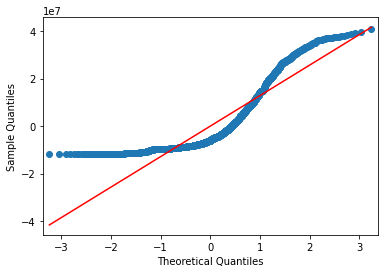

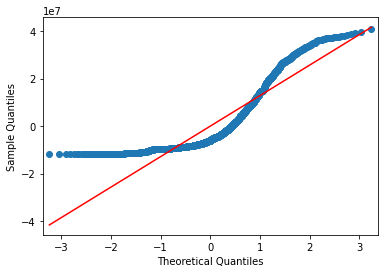

In [44]:
movie_score_international_box_office_lm = smf.ols('international_box_office ~ movie_score', data = df).fit() #Thierry van Gorkum
residuals3 = movie_score_international_box_office_lm.resid
sm.qqplot(residuals3,stats.norm,  line = 's')
plt.show()

(array([1070.,  262.,  142.,  122.,   71.]),
 array([-11796194.11165846,  -1215259.20140406,   9365675.70885033,
         19946610.61910473,  30527545.52935912,  41108480.43961352]),
 <BarContainer object of 5 artists>)

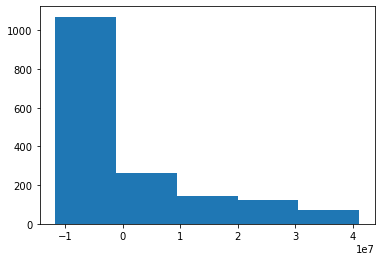

In [45]:
plt.hist(residuals3, bins=5)


<AxesSubplot:xlabel='international_box_office', ylabel='movie_score'>

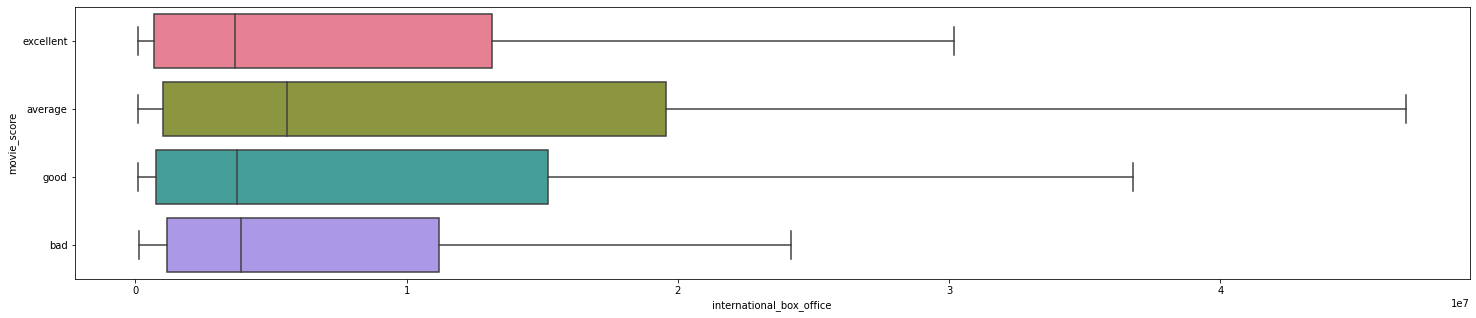

In [46]:
fig = plt.subplots(figsize=(25,5))
sns.boxplot(x ='international_box_office', y = 'movie_score', data= df, palette="husl", showfliers=False)
plt.show()

In [47]:
Anovaformula = 'international_box_office ~ movie_score' #Thierry van Gorkum
movie_time_movie_score_genre = smf.ols(Anovaformula, data = df).fit()
anova_table = sm.stats.anova_lm(movie_time_movie_score_genre)
print(anova_table)

                 df        sum_sq       mean_sq         F    PR(>F)
movie_score     3.0  2.199253e+15  7.330843e+14  4.424928  0.004172
Residual     1663.0  2.755117e+17  1.656715e+14       NaN       NaN


### What is the correlation between runtime and genre(s) compared to the international box office revenue? 

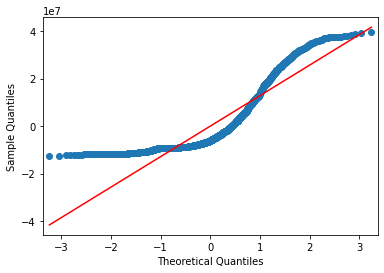

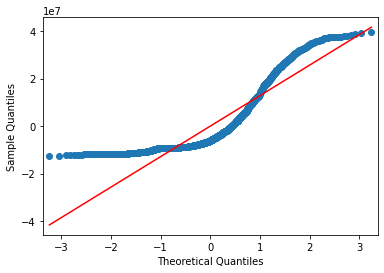

In [48]:
movie_time_international_box_office_lm = smf.ols('international_box_office ~ movie_time', data = df).fit() #Thierry van Gorkum
residuals = movie_time_international_box_office_lm.resid
sm.qqplot(residuals,stats.norm,  line = 's')
plt.show()

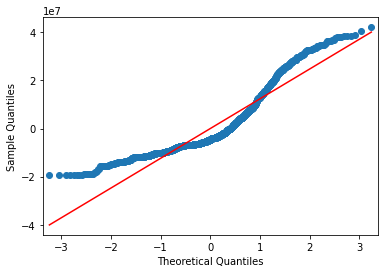

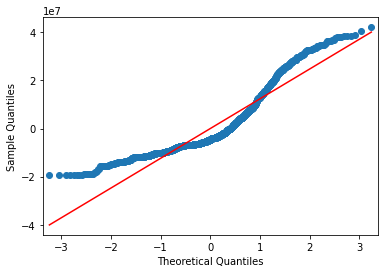

In [49]:
runtime_international_box_office_lm = smf.ols('international_box_office ~ genre ', data = df).fit() #Thierry van Gorkum
residuals2 = runtime_international_box_office_lm.resid
sm.qqplot(residuals2, stats.norm, line = 's')
plt.show()

(array([727., 309., 162., 107.,  96.,  64.,  59.,  61.,  44.,  38.]),
 array([-12460130.95833332,  -7243389.36209431,  -2026647.7658553 ,
          3190093.83038371,   8406835.42662272,  13623577.02286174,
         18840318.61910075,  24057060.21533976,  29273801.81157877,
         34490543.40781779,  39707285.0040568 ]),
 <BarContainer object of 10 artists>)

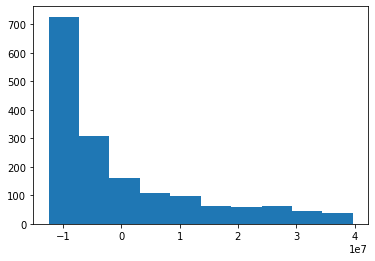

In [50]:
plt.hist(residuals, bins=10)

(array([496., 754., 217., 137.,  63.]),
 array([-19351664.61458325,  -7064355.43088561,   5222953.75281204,
         17510262.93650968,  29797572.12020733,  42084881.30390498]),
 <BarContainer object of 5 artists>)

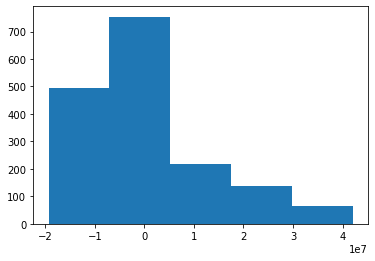

In [51]:
plt.hist(residuals2, bins=5)

<AxesSubplot:xlabel='international_box_office', ylabel='movie_time'>

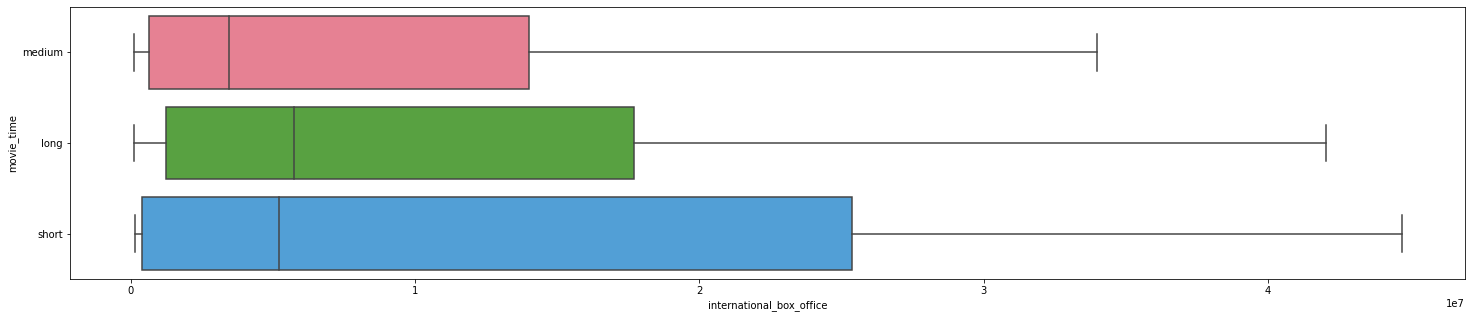

In [52]:
fig = plt.subplots(figsize=(25,5))
sns.boxplot(x ='international_box_office', y = 'movie_time', data= df, palette="husl", showfliers=False)
plt.show()

<AxesSubplot:xlabel='international_box_office', ylabel='genre'>

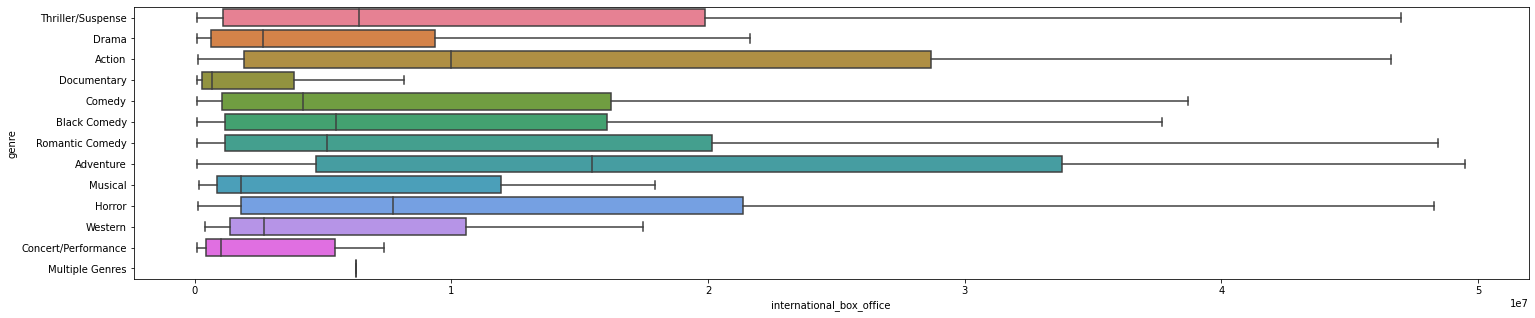

In [53]:
fig = plt.subplots(figsize=(25,5))
sns.boxplot(x ='international_box_office', y = 'genre', data= df, palette="husl", showfliers=False)
plt.show()

In [54]:
M_box_Thrill_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Thriller/Suspense'].values
S_box_Thrill_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Thriller/Suspense'].values
L_box_Thrill_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Thriller/Suspense'].values

M_box_Drama_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Drama'].values
S_box_Drama_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Drama'].values
L_box_Drama_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Drama'].values

M_box_Horror_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Horror'].values
S_box_Horror_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Horror'].values
L_box_Horror_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Horror'].values

M_box_Action_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Action'].values
S_box_Action_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Action'].values
L_box_Action_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Action'].values

M_box_Documentary_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Documentary'].values
S_box_Documentary_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Documentary'].values
L_box_Documentary_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Documentary'].values

M_box_Comedy_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Comedy'].values
S_box_Comedy_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Comedy'].values
L_box_Comedy_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Comedy'].values

M_box_BComedy_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Black Comedy'].values
S_box_BComedy_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Black Comedy'].values
L_box_BComedy_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Black Comedy'].values

M_box_RComedy_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Romantic Comedy'].values
S_box_RComedy_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Romantic Comedy'].values
L_box_RComedy_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Romantic Comedy'].values

M_box_Adventure_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Adventure'].values
S_box_Adventure_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Adventure'].values
L_box_Adventure_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Adventure'].values

M_box_Musical_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Musical'].values
S_box_Musical_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Musical'].values
L_box_Musical_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Musical'].values

M_box_Western_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Western'].values
S_box_Western_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Western'].values
L_box_Western_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Western'].values

M_box_CP_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Concert/Performance'].values
S_box_CP_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Concert/Performance'].values
L_box_CP_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Concert/Performance'].values

M_box_MG_BP = df[df['movie_time'] =='medium']['international_box_office'][df['genre']== 'Multiple Genres'].values
S_box_MG_BP = df[df['movie_time'] =='short']['international_box_office'][df['genre']== 'Multiple Genres'].values
L_box_MG_BP = df[df['movie_time'] =='long']['international_box_office'][df['genre']== 'Multiple Genres'].values




In [55]:
statistic_barlette, p_barlette = stats.bartlett(M_box_Thrill_BP, S_box_Thrill_BP, L_box_Thrill_BP, M_box_Drama_BP, S_box_Drama_BP, L_box_Drama_BP, M_box_Horror_BP, S_box_Horror_BP, L_box_Horror_BP, M_box_Action_BP, S_box_Action_BP, L_box_Action_BP, M_box_Documentary_BP, S_box_Documentary_BP, L_box_Documentary_BP, M_box_Comedy_BP, S_box_Comedy_BP, L_box_Comedy_BP, M_box_BComedy_BP, S_box_BComedy_BP, L_box_BComedy_BP, M_box_RComedy_BP, S_box_RComedy_BP, L_box_RComedy_BP, M_box_Adventure_BP, S_box_Adventure_BP, L_box_Adventure_BP, M_box_Musical_BP, S_box_Musical_BP, L_box_Musical_BP, M_box_Western_BP, S_box_Western_BP, L_box_Western_BP, M_box_CP_BP, S_box_CP_BP, L_box_CP_BP, M_box_MG_BP, S_box_MG_BP, L_box_MG_BP)
#From lecture
if p_barlette < 0.05:
    print('Null hypothesis that all input samples are from populations with equal variances is REJECTED')
else:
    print('We FAIL to REJECT the null hypothesis that all input samples are from populations with equal variances')

We FAIL to REJECT the null hypothesis that all input samples are from populations with equal variances


In [56]:
statistic_levene, p_levene = stats.levene(M_box_Thrill_BP, S_box_Thrill_BP, L_box_Thrill_BP, M_box_Drama_BP, S_box_Drama_BP, L_box_Drama_BP, M_box_Horror_BP, S_box_Horror_BP, L_box_Horror_BP, M_box_Action_BP, S_box_Action_BP, L_box_Action_BP, M_box_Documentary_BP, S_box_Documentary_BP, L_box_Documentary_BP, M_box_Comedy_BP, S_box_Comedy_BP, L_box_Comedy_BP, M_box_BComedy_BP, S_box_BComedy_BP, L_box_BComedy_BP, M_box_RComedy_BP, S_box_RComedy_BP, L_box_RComedy_BP, M_box_Adventure_BP, S_box_Adventure_BP, L_box_Adventure_BP, M_box_Musical_BP, S_box_Musical_BP, L_box_Musical_BP, M_box_Western_BP, S_box_Western_BP, L_box_Western_BP, M_box_CP_BP, S_box_CP_BP, L_box_CP_BP, M_box_MG_BP, S_box_MG_BP, L_box_MG_BP)
if p_levene < 0.05:
    print('Null hypothesis that all input samples are from populations with equal variances is REJECTED')
else:
    print('We FAIL to REJECT the null hypothesis that all input samples are from populations with equal variances')
    #From lecture

We FAIL to REJECT the null hypothesis that all input samples are from populations with equal variances


c:\Users\olgal\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\olgal\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [57]:
Anovaformula = 'international_box_office ~ genre*movie_time' #Thierry van Gorkum
international_box_office_genre_movie_time_lm = smf.ols(Anovaformula, data = df).fit()
twoWay_anova_table = sm.stats.anova_lm(international_box_office_genre_movie_time_lm)
print(twoWay_anova_table)

                      df        sum_sq       mean_sq          F        PR(>F)
genre               12.0  2.257667e+16  1.881389e+15  12.483093  1.040382e-24
movie_time           2.0  4.959688e+15  2.479844e+15  16.453866  8.416630e-08
genre:movie_time    24.0  5.769477e+15  2.403949e+14   1.595030  3.391812e-02
Residual          1635.0  2.464190e+17  1.507150e+14        NaN           NaN


genre = Reject H0, since 9.782636e-109 < alpha 0.05
movie_time = Reject H0, since 5.203566e-24 < alpha 0.05 
genre:movie= Reject H0, since 7.760865e-13 < alpha 0.05 

In [58]:
df.head()

,title,rating,runtime,director,summary,metascore,RelDate,year,release_date,genre,international_box_office,movie_time,movie_score,average_score,time_score,genre_time,genre_score,runtime_score,genre_rating
0,10 Cloverfield Lane,| PG-13,104.0,Dan Trachtenberg,"Waking up from a car accident, a young woman (...",76.0,2016-03-11,2016.0,March 11th,Thriller/Suspense,36203423.0,medium,excellent,8,excellent-medium,Thriller/Suspense-medium,Thriller/Suspense-excellent,104.0-medium,Thriller/Suspense-excellent-76.0
14,127 Hours,| R,94.0,Danny Boyle,127 HOURS is the true story of mountain climbe...,82.0,2010-11-05,2010.0,November 5th,Drama,41881941.0,medium,excellent,8,excellent-medium,Drama-medium,Drama-excellent,94.0-medium,Drama-excellent-82.0
19,15 Minutes,| R,120.0,John Herzfeld,A thriller seen through an eye-popping new len...,34.0,2001-03-09,2001.0,March 9th,Thriller/Suspense,31956428.0,long,average,3,average-long,Thriller/Suspense-long,Thriller/Suspense-average,120.0-long,Thriller/Suspense-average-34.0
20,16 Blocks,| PG-13,105.0,Richard Donner,The story of how two men change -- and change ...,63.0,2006-03-03,2006.0,March 3rd,Action,28700000.0,medium,good,6,good-medium,Action-medium,Action-good,105.0-medium,Action-good-63.0
28,"20,000 Days on Earth",| Not Rated,97.0,Iain Forsyth,Drama and reality combine in a fictitious 24 h...,83.0,2014-09-17,2014.0,September 17th,Documentary,1701281.0,medium,excellent,8,excellent-medium,Documentary-medium,Documentary-excellent,97.0-medium,Documentary-excellent-83.0


### PCA

In [59]:
df2 = df[['rating','runtime', 'metascore', 'genre', 'movie_time', 'movie_score', 'average_score', 'international_box_office']].copy()

df2.dropna

<bound method DataFrame.dropna of            rating  runtime  metascore              genre movie_time  \
0         | PG-13    104.0       76.0  Thriller/Suspense     medium   
14            | R     94.0       82.0              Drama     medium   
19            | R    120.0       34.0  Thriller/Suspense       long   
20        | PG-13    105.0       63.0             Action     medium   
28    | Not Rated     97.0       83.0        Documentary     medium   
...           ...      ...        ...                ...        ...   
4830          | R     99.0       55.0             Comedy     medium   
4831          | R     89.0       61.0             Comedy     medium   
4832      | PG-13    102.0       34.0             Comedy     medium   
4834         | PG     83.0       26.0          Adventure     medium   
4836  | Not Rated     96.0       55.0          Adventure     medium   

     movie_score average_score  international_box_office  
0      excellent             8                36203423

In [60]:
dict_rating = {'| PG-13': 0, '| Not Rated': 1, '| R': 2, '| TV-MA': 3, '| Unrated': 4, '| PG': 5, '| G': 6, '| NC-17': 7, '| NR': 8, '| TV-PG': 9, '| TV-14': 10, '| TV-G': 11, '| Open': 12}

#dict_genre = {"Thriller/Suspense": 0, "Drama": 1, "Horror": 2, "Action": 3, "Documentary": 4, "Comedy": 5, "Romantic Comedy": 6, "Black Comedy": 7, "Adventure": 8, "Musical": 9, "Western": 10, "Concert/Performance": 11, "Multiple Genres": 12}


dict_time_score = {'bad-medium': 0, 'bad-long': 1, 'average-short': 2, 'average-medium': 3, 'average-long': 4, 'good-short': 5, 'good-medium': 6, 'good-long': 7, 'excellent-short': 8, 'excellent-medium': 9, 'excellent-long': 10}


df2.replace({ "rating": dict_rating}, inplace = True)
df2.head()

,rating,runtime,metascore,genre,movie_time,movie_score,average_score,international_box_office
0,0,104.0,76.0,Thriller/Suspense,medium,excellent,8,36203423.0
14,2,94.0,82.0,Drama,medium,excellent,8,41881941.0
19,2,120.0,34.0,Thriller/Suspense,long,average,3,31956428.0
20,0,105.0,63.0,Action,medium,good,6,28700000.0
28,1,97.0,83.0,Documentary,medium,excellent,8,1701281.0


<AxesSubplot:>

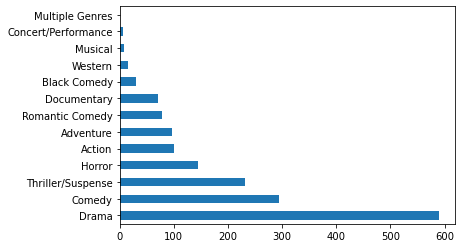

In [61]:
df2.genre.value_counts().plot(kind='barh')     #Olga

In [62]:
#we will remove the least frequent category   #olga
df2 = df2[df2.genre!='Multiple Genres']

In [63]:
#creating key-value pair to encode categories to int dtype   Olga
type_keys = {"genre": {"Thriller/Suspense": 0,
                        "Drama": 1,
                        "Horror": 2,
                        "Action": 3,
                        "Documentary": 4,
                        "Comedy": 5, 
                        "Romantic Comedy": 6, 
                        "Black Comedy": 7,
                        "Adventure": 8, 
                        "Musical": 9,
                        "Western": 10, 
                        "Concert/Performance": 11
                        }}

In [64]:
df2['genre_type'] = df2.replace(type_keys)['genre']  #Olga

C:\Users\olgal\AppData\Local\Temp\ipykernel_32740\1328483157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genre_type'] = df2.replace(type_keys)['genre']  #Olga


In [65]:
pd.get_dummies(df2.genre, prefix='type')   # Olga

,type_Action,type_Adventure,type_Black Comedy,type_Comedy,type_Concert/Performance,type_Documentary,type_Drama,type_Horror,type_Musical,type_Romantic Comedy,type_Thriller/Suspense,type_Western
0,0,0,0,0,0,0,0,0,0,0,1,0
14,0,0,0,0,0,0,1,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,1,0
20,1,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,0,0,1,0,0,0,0,0,0,0,0
4831,0,0,0,1,0,0,0,0,0,0,0,0
4832,0,0,0,1,0,0,0,0,0,0,0,0
4834,0,1,0,0,0,0,0,0,0,0,0,0


In [66]:
dict_movie_time = {'short': 0, 'medium': 1,'long': 2}

dict_movie_score = {'bad': 0, 'average': 1,'good': 2, 'excellent': 3}

df2.replace({"movie_time": dict_movie_time, "movie_score": dict_movie_score}, inplace = True)
df2.head()

C:\Users\olgal\AppData\Local\Temp\ipykernel_32740\3791683622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({"movie_time": dict_movie_time, "movie_score": dict_movie_score}, inplace = True)


,rating,runtime,metascore,genre,movie_time,movie_score,average_score,international_box_office,genre_type
0,0,104.0,76.0,Thriller/Suspense,1,3,8,36203423.0,0
14,2,94.0,82.0,Drama,1,3,8,41881941.0,1
19,2,120.0,34.0,Thriller/Suspense,2,1,3,31956428.0,0
20,0,105.0,63.0,Action,1,2,6,28700000.0,3
28,1,97.0,83.0,Documentary,1,3,8,1701281.0,4


In [67]:
## feature scaling
from sklearn.preprocessing import StandardScaler
# define standard scaler instance
scaler = StandardScaler()
# Fitting the StandardScaler to df
scaler.fit(df)
# Scaling df used the fitting Standard scalar
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

ValueError: could not convert string to float: '10 Cloverfield Lane'

<BarContainer object of 9 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal component index')

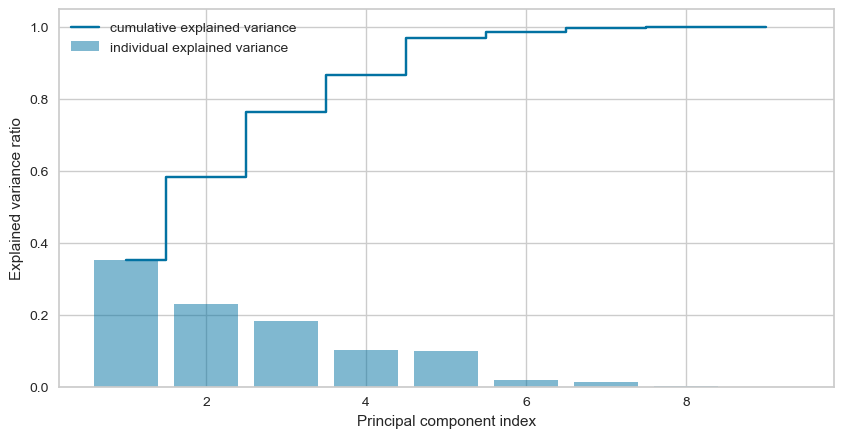

In [ ]:
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
#Let's say you would like to explain x% variance  
var_exp_thres = 0.5
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 50% variance is 2


In [ ]:
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df2.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['metascore' 'genre']


### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(4, 12))

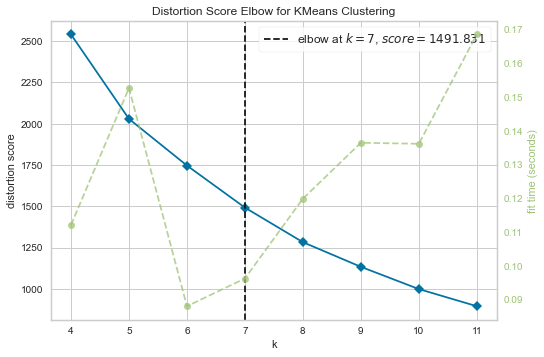

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

The best cluster number is: 7


In [ ]:
## performing the elbow method
# Instantiate the clustering model and visualizer
kmeans = KMeans() 
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [ ]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
cluster_labels_PCs = kmeans_best_cluster.labels_

KMeans(n_clusters=7)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(4, 12))

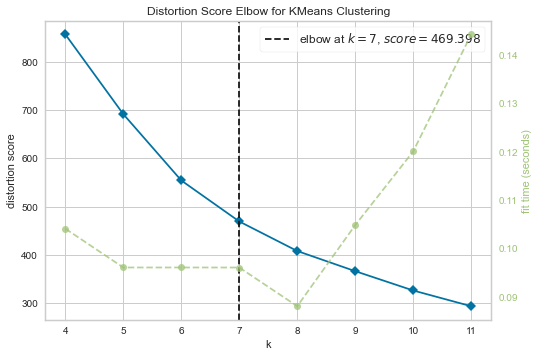

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

7

The best cluster number is: 7


In [ ]:
# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(df_scaled[most_important_features])        # Fit the important features data to the visualizer
visualizer.show()        # Finalize and render the figure
visualizer.elbow_value_ # Get elbow value

print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [ ]:
## Kmeans with 7 clusters
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(df_scaled[most_important_features])
#saving the cluster labels
cluster_labels_ImpFeatures = kmeans_best_cluster.labels_

KMeans(n_clusters=7)

In [ ]:
from sklearn import metrics
sc = []
dbi = []

#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, cluster_labels_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, cluster_labels_PCs))

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], cluster_labels_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], cluster_labels_ImpFeatures))

Kmeans_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'Kmeans_methods':Kmeans_methods }
df_metrics = pd.DataFrame(d)
df_metrics.set_index('Kmeans_methods', inplace = True)
df_metrics

,silhouette_score,DBI
Kmeans_methods,,
Kmean_on_PCs,0.397569,0.842247
Kmean_on_ImpFeatures,0.421238,0.766862


ValueError: 'c' argument has 1667 elements, which is inconsistent with 'x' and 'y' with size 3334.

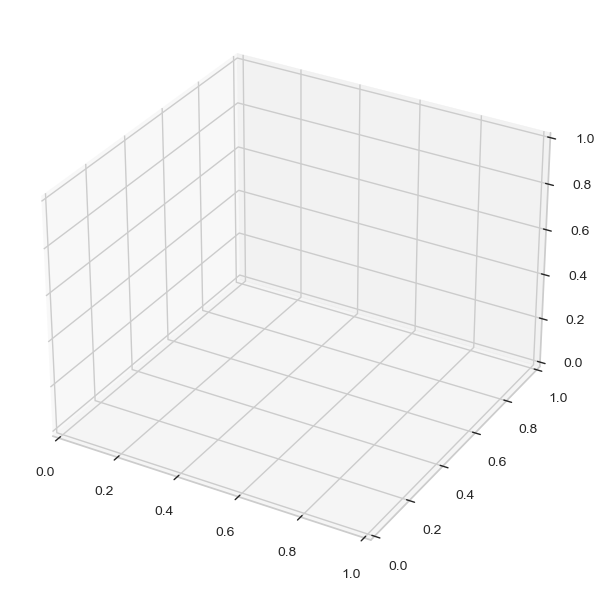

In [ ]:
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
sc = ax.scatter(pca_comps[:],pca_comps[:],pca_comps[:], c = cluster_labels_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
sc = ax.scatter(df_scaled[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
                        c = cluster_labels_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[:])
ax.set_ylabel(most_important_features[:])
ax.set_zlabel(most_important_features[:])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
sc = ax.scatter(df[most_important_features[0]],df[most_important_features[1]],df[most_important_features[2]], 
                        c = cluster_labels_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[:])
ax.set_ylabel(most_important_features[:])
ax.set_zlabel(most_important_features[:])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

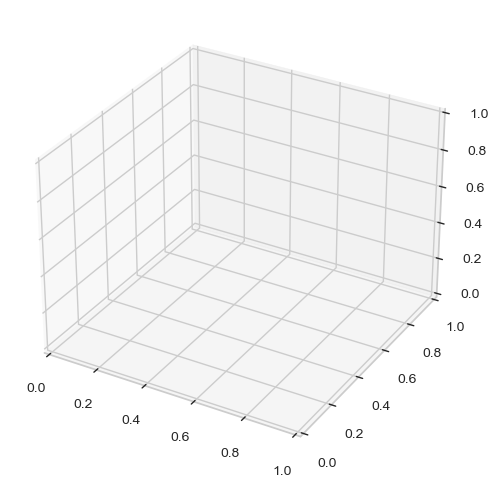

In [ ]:
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import ListedColormap
# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

#fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
#ax = fig.add_subplot(1, 3, 1, projection='3d')
#sc = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = cluster_labels_PCs, marker='o', cmap=cmap, alpha=1)
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
#ax.set_title('Clusters computed from important PCs')
#ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
#ax.view_init(-150, -30)


# set up the axes for the second plot
#ax = fig.add_subplot(1, 3, 2, projection='3d')
#sc = ax.scatter(df_scaled[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
#                        c = cluster_labels_ImpFeatures, marker='o', cmap=cmap, alpha=1)
#ax.set_xlabel(most_important_features[0])
#ax.set_ylabel(most_important_features[1])
#ax.set_zlabel(most_important_features[2])
#ax.set_title('Clusters computed from important features from PCA')
#ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
#ax = fig.add_subplot(1, 3, 3, projection='3d')
#sc = ax.scatter(df[most_important_features[0]],df[most_important_features[1]],df[most_important_features[2]], 
#                        c = cluster_labels_ImpFeatures, marker='o', cmap=cmap, alpha=1)
#ax.set_xlabel(most_important_features[0])
#ax.set_ylabel(most_important_features[1])
#ax.set_zlabel(most_important_features[2])
#ax.set_title('Clusters computed from important features from PCA')
#ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [ ]:
#adding the cluster column to the original dataset
df2['cluster'] = cluster_labels_ImpFeatures
df2.head()

,rating,runtime,metascore,genre,movie_time,movie_score,average_score,international_box_office,cluster
0,0,104.0,76.0,0,1,3,8,36203423.0,1
4,1,93.0,65.0,1,1,2,7,36036.0,1
7,2,107.0,36.0,1,1,1,4,89080.0,4
13,2,134.0,96.0,1,2,3,10,124093068.0,3
14,2,94.0,82.0,1,1,3,8,41881941.0,1


<AxesSubplot:xlabel='cluster', ylabel='Count'>

Text(0.0, 345, '12.9%')

Text(1.0, 617, '23.4%')

Text(2.0, 655, '24.9%')

Text(3.0, 467, '17.6%')

Text(4.0, 510, '19.3%')

Text(5.0, 61, '2.0%')

<AxesSubplot:xlabel='cluster', ylabel='proportion'>

<AxesSubplot:xlabel='cluster', ylabel='movie_time'>

<AxesSubplot:xlabel='cluster', ylabel='count'>

<AxesSubplot:xlabel='cluster', ylabel='proportion'>

<AxesSubplot:xlabel='cluster', ylabel='runtime'>

Text(0, 0.5, 'Income')

<AxesSubplot:xlabel='cluster', ylabel='international_box_office'>

<AxesSubplot:xlabel='cluster', ylabel='metascore'>

Text(0, 0.5, 'metascore')

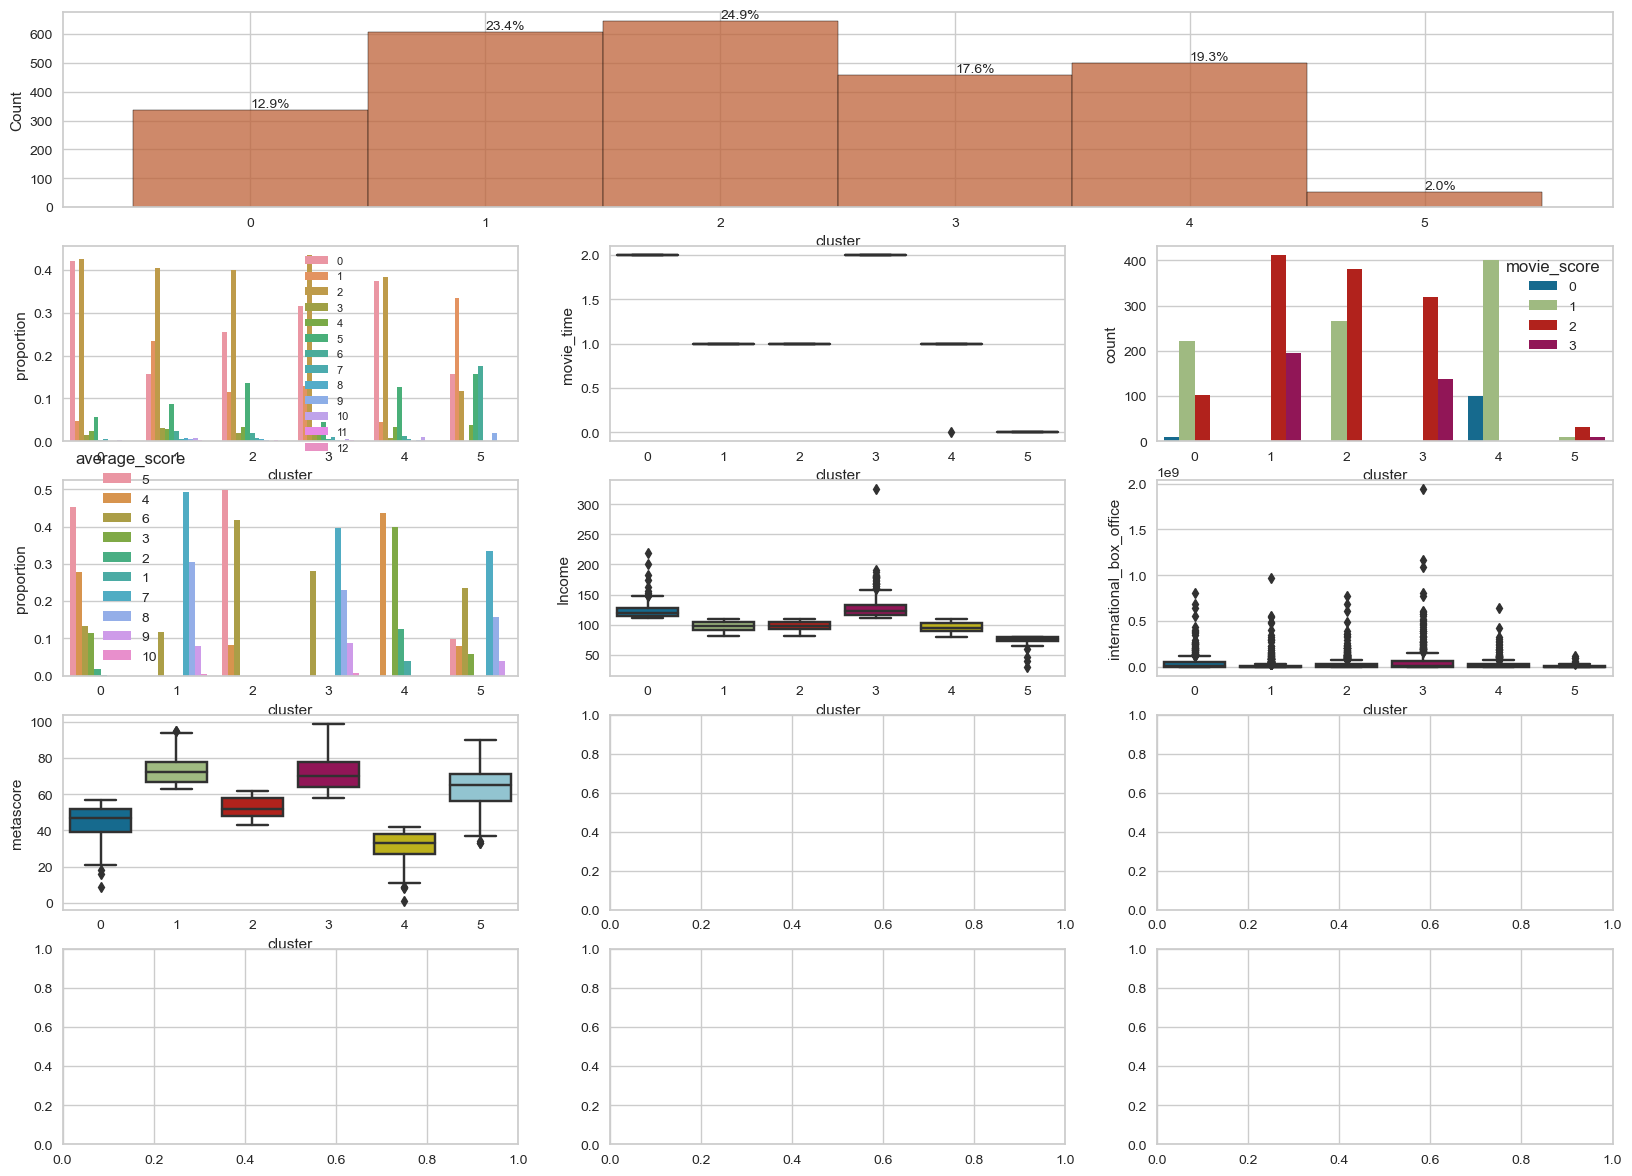

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5,3)
fig = plt.figure(figsize=(20, 15), dpi=100)
ax1=fig.add_subplot(gs[0,:])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[1,2])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[3,0])
ax9=fig.add_subplot(gs[3,1])
ax10=fig.add_subplot(gs[3,2])
ax11=fig.add_subplot(gs[4,0])
ax12=fig.add_subplot(gs[4,1])
ax13=fig.add_subplot(gs[4,2])

# Cluster size
sns.histplot(data = df2, x = "cluster", discrete = True, color = '#be6238', ax = ax1)
for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format((p.get_height()/len(df2))*100), (p.get_x() + 0.5, p.get_height() + 10), fontsize=10)

# rating per cluster
counted = df2.groupby('cluster').rating.value_counts(normalize=True).reset_index(name="proportion")
sns.barplot(data=counted, x='cluster', y='proportion', hue='rating', ax = ax2)
ax2.legend(loc=1, bbox_to_anchor=(0.65,1), fontsize=8)

# movie time per cluster 
sns.boxplot(data=df2, y='movie_time', x='cluster', ax= ax3)

# movie score  per cluster 
sns.countplot(data=df2, hue="movie_score", x="cluster", ax = ax4)
#ax4.legend(loc=1, bbox_to_anchor=(0.65,0.5), fontsize=8)

#average score  per cluster
counted = df2.groupby('cluster').average_score.value_counts(normalize=True).reset_index(name="proportion")
sns.barplot(data=counted, x='cluster', y='proportion', hue='average_score', ax = ax5)

#runtime per cluster
sns.boxplot(data=df2, y='runtime', x='cluster', ax = ax6)
ax6.set_ylabel('Income')

#international box office per cluster 
sns.boxplot(data=df2, y='international_box_office', x='cluster', ax = ax7)

# metascore per cluster
sns.boxplot(data=df2, y='metascore', x='cluster', ax = ax8)
ax8.set_ylabel('metascore')

# Average purchases made per channel per cluster
#accepted = df2.groupby("cluster")[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].mean().T
#accepted.plot(kind='bar', rot=0, ax = ax9)
#ax9.set_ylabel('Average purchases made')
#ax9.legend(title="cluster", loc=1, bbox_to_anchor=(0.75,0.75), fontsize=8)

#Promotion acceptance rate per cluster
#accepted = df2.groupby("cluster")[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].mean()
#accepted.plot(kind='bar', rot=0, ax = ax10)
#ax10.set_ylabel('Promotion acceptance rate')

#Recency per cluster
#sns.boxplot(data=df2, y='Recency', x='cluster', ax = ax11)
#ax11.set_ylabel('Recency (days)')

#Average amount spent per product category
#cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
#avg_prod = df2.groupby("cluster")[cols].mean().T
#avg_prod.plot(kind='bar', rot=45, ax = ax12)
#ax12.set_ylabel('Average amount spent')

plt.show()

Random forrest Model #Nico

In [ ]:
df2  #Nico. Noticed that the index was not right. So made a new one.

In [ ]:
df_movies_new = df2.reset_index(drop = True)   #Nico #Created a new index with the 7 features as X and the international box office as Y
x = df_movies_new.iloc[: , :7]
y = df_movies_new['international_box_office']

In [ ]:
df_movies_new   #Nico new index in the right order

In [ ]:
df_movies_new.isnull().values.any()  #Nico #Checked if any values where missing because I got some errors below. Via #https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #Nico #imported the RFR via https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(12, 6)) # create figure and axes Shaun

numeric_cols = ['runtime', 'metascore','international_box_office']
for i,el in enumerate(numeric_cols):
    a = sns.boxplot(data=df_movies_new[el], orient='h', ax=axes.flatten()[i])
    a.set_title(el)
    #df.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 
fig.delaxes(axes[1,2])
plt.show()

In [ ]:

import pickle
import re
import string
from pprint import pprint
import pdb
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
#outlier removal   Shaun
#We observe one outlier in runtime,
df_movies_new = df_movies_new[(df_movies_new.runtime<300)]

In [ ]:
# Assigning the data corresponding to the target and predictor variables  Shaun
y = df_movies_new['international_box_office']
X = df_movies_new[['runtime', 'metascore', 'genre_type']]
#X = df_movies_new[['runtime', 'metascore', 'userscore','movie_type','day','month','year']]

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,


In [ ]:
X_test_full, X_valid_full, y_test, y_valid = train_test_split(X_valid_full, y_valid, train_size=0.75, test_size=0.25,
                                                                random_state=0)

In [ ]:
print(f'training set: {len(y_train)}\ntest set: {len(y_test)}\nvalidation set:{len(y_valid)}')

In [ ]:
# Defining a default the Random Forest Model 
rf_default = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_default.fit(X_train_full, y_train)

In [ ]:
# Look at parameters used by default forest
print('Parameters currently in use:\n')
pprint(rf_default.get_params())

In [ ]:
#Viewing results
y_pred_rf = rf_default.predict(X_valid_full)

# Calculate MAE 
mae_rf = mean_absolute_error(y_pred_rf, y_valid)

print("Mean Absolute Error RF:" , mae_rf)

In [ ]:
feat_importances = pd.Series(rf_default.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
#DEFINING GRID SEARCH PARAMETERS
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_full, y_train)

In [ ]:
best_random = rf_random.best_estimator_
best_random.get_params()

In [ ]:
y_pred_rf = best_random.predict(X_valid_full)

# Calculate MAE 
mae_rf = mean_absolute_error(y_pred_rf, y_valid)

print("Mean Absolute Error RF:" , mae_rf)

In [ ]:
feat_importances = pd.Series(best_random.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')